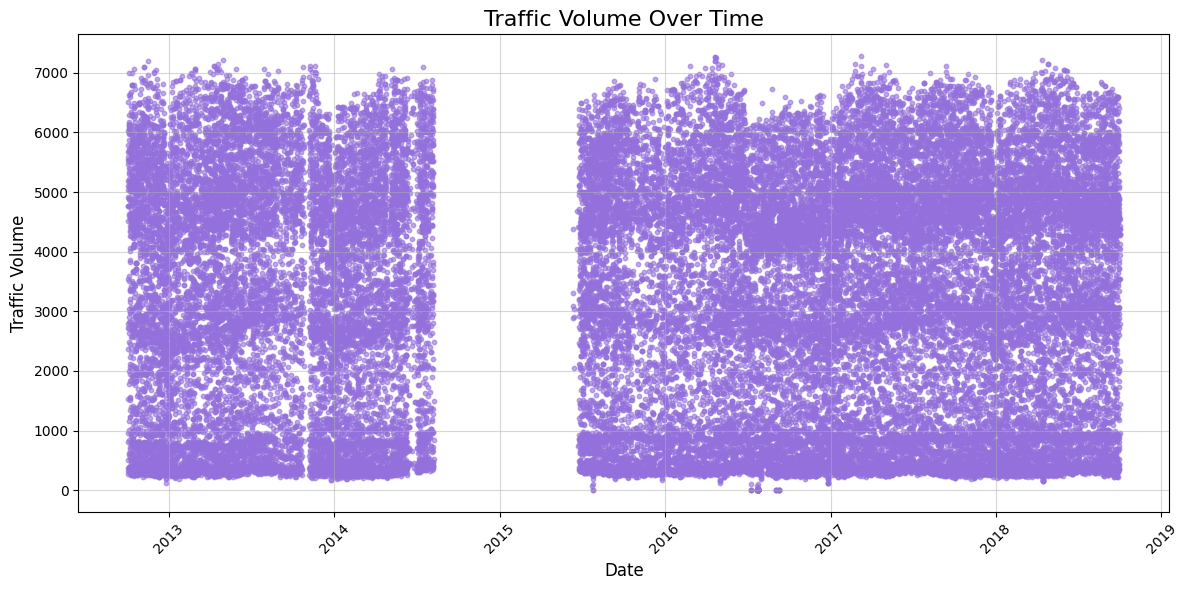

Scatterplot saved as: C:\Users\thinu\Desktop\KENULA\top-up\data\traffic_volume_scatterplot.png


In [1]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp

# Initialize SparkSession
spark = SparkSession.builder.appName("TrafficVolumeScatterPlot").getOrCreate()

# Load Dataset (Ensure the correct file path and extension)
file_path = r'C:\Users\thinu\Desktop\KENULA\top-up\data\cleaned_transformed_dataset1.csv'  # Update with your correct file path
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert date_time to timestamp
data = data.withColumn("date_time", to_timestamp("date_time"))

# Drop rows with null values in important columns
data = data.dropna(subset=["date_time", "traffic_volume"])

# Sort Data by date_time
data = data.orderBy("date_time")

# Convert to Pandas for Visualization
scatter_data = data.select("date_time", "traffic_volume").toPandas()

# Create Scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['date_time'], scatter_data['traffic_volume'], alpha=0.6, color="MediumPurple", s=10)
plt.title("Traffic Volume Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Traffic Volume", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

# Save Plot as PNG (Update with your desired location)
scatterplot_path = r'C:\Users\thinu\Desktop\KENULA\top-up\data\traffic_volume_scatterplot.png'  # Update this with your desired location
plt.savefig(scatterplot_path, format='png', dpi=300)
plt.show()
print(f"Scatterplot saved as: {scatterplot_path}")